#**Image Classification Using QuadrupletLoss + Cross Entropy for Lensless Images**

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!mkdir dataset

##Data loading

In [3]:
!unzip "/content/drive/MyDrive/lensless_dataset.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000192.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000273.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000291.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000377.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000460.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000462.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000504.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000668.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000669.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000822.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000840.jpeg  
  inflating: /content/dataset/lensless_cifar10/

In [4]:
import pandas as pd

# Set the file path
file_path = '/content/drive/MyDrive/Thesis_model/train_dataframe.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [5]:
df_train = df.sample(frac=0.8)

In [6]:
df_val = df.drop(df_train.index)

In [7]:
import pandas as pd

# Set the file path
test_file_path = '/content/drive/MyDrive/Thesis_model/test_dataframe.csv'

# Load the CSV file into a pandas DataFrame
df_test = pd.read_csv(test_file_path)

In [8]:
df_train

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
48342,tipper_truck_s_001639.jpeg,tipper_truck_s_001639.png,tipper_truck_s_001660.png,spadefoot_s_000814.png,9,truck
42321,minesweeper_s_001415.jpeg,minesweeper_s_001415.png,minesweeper_s_001417.png,sparrow_s_000023.png,8,ship
19319,tabby_s_001964.jpeg,tabby_s_001964.png,tabby_s_001965.png,fire_truck_s_000950.png,3,cat
4448,stealth_fighter_s_000576.jpeg,stealth_fighter_s_000576.png,stealth_fighter_s_000577.png,tabby_s_000818.png,0,airplane
47954,tipper_s_000736.jpeg,tipper_s_000736.png,tipper_s_000737.png,odocoileus_hemionus_s_001206.png,9,truck
...,...,...,...,...,...,...
43432,police_boat_s_001609.jpeg,police_boat_s_001609.png,police_boat_s_001614.png,seaplane_s_000781.png,8,ship
32704,leopard_frog_s_001429.jpeg,leopard_frog_s_001429.png,leopard_frog_s_001430.png,station_wagon_s_001178.png,6,frog
8428,estate_car_s_001744.jpeg,estate_car_s_001744.png,estate_car_s_001758.png,leopard_frog_s_001735.png,1,automobile
13164,ostrich_s_002264.jpeg,ostrich_s_002264.png,ostrich_s_002265.png,maltese_dog_s_000694.png,2,bird


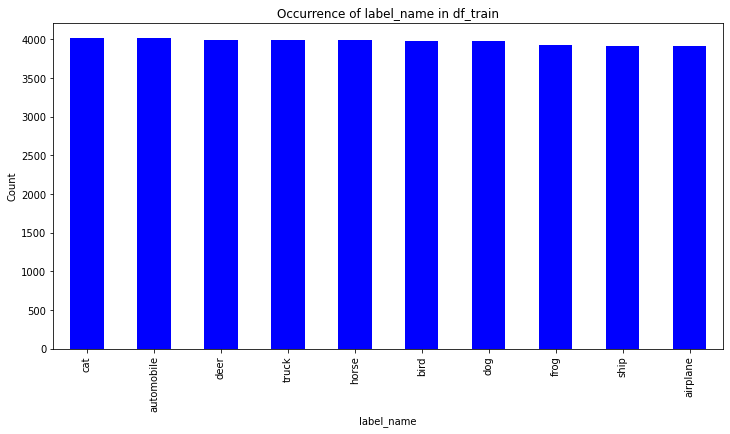

In [9]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_train['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_train')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [10]:
df_val

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
1,aeroplane_s_000021.jpeg,aeroplane_s_000021.png,aeroplane_s_000022.png,bufo_marinus_s_000961.png,0,airplane
12,aeroplane_s_000044.jpeg,aeroplane_s_000044.png,aeroplane_s_000068.png,male_horse_s_000348.png,0,airplane
24,airbus_s_000019.jpeg,airbus_s_000019.png,airbus_s_000023.png,tow_truck_s_000512.png,0,airplane
30,airbus_s_000055.jpeg,airbus_s_000055.png,airbus_s_000059.png,pilot_boat_s_001197.png,0,airplane
39,airbus_s_000109.jpeg,airbus_s_000109.png,airbus_s_000112.png,sound_truck_s_001902.png,0,airplane
...,...,...,...,...,...,...
49582,wrecker_s_002186.jpeg,wrecker_s_002186.png,wrecker_s_002195.png,lippizaner_s_000946.png,9,truck
49592,wrecker_s_002282.jpeg,wrecker_s_002282.png,wrecker_s_002292.png,alces_alces_s_001934.png,9,truck
49595,wrecker_s_002295.jpeg,wrecker_s_002295.png,wrecker_s_002298.png,lipizzan_s_001771.png,9,truck
49604,wrecker_s_002326.jpeg,wrecker_s_002326.png,wrecker_s_002365.png,passerine_s_001221.png,9,truck


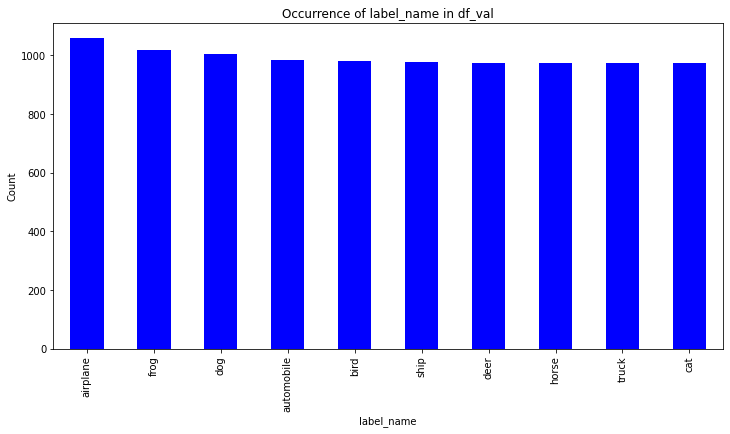

In [11]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_val['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_val')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [12]:
df_test

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
0,test-abandoned_ship_s_000213.jpeg,test-abandoned_ship_s_000213.png,test-abandoned_ship_s_000260.png,test-dama_dama_s_000300.png,8,ship
1,test-abandoned_ship_s_000260.jpeg,test-abandoned_ship_s_000260.png,test-abandoned_ship_s_000380.png,test-compact_car_s_001759.png,8,ship
2,test-abandoned_ship_s_000380.jpeg,test-abandoned_ship_s_000380.png,test-abandoned_ship_s_000635.png,test-mongrel_s_002015.png,8,ship
3,test-abandoned_ship_s_000635.jpeg,test-abandoned_ship_s_000635.png,test-abandoned_ship_s_000735.png,test-bufo_americanus_s_001561.png,8,ship
4,test-abandoned_ship_s_000735.jpeg,test-abandoned_ship_s_000735.png,test-abandoned_ship_s_001201.png,test-musk_deer_s_000006.png,8,ship
...,...,...,...,...,...,...
9639,test-wrecker_s_002227.jpeg,test-wrecker_s_002227.png,test-wrecker_s_002302.png,test-mule_deer_s_001693.png,9,truck
9640,test-wrecker_s_002302.jpeg,test-wrecker_s_002302.png,test-wrecker_s_002367.png,test-stealth_bomber_s_000756.png,9,truck
9641,test-yosemite_toad_s_000002.jpeg,test-yosemite_toad_s_000002.png,test-yosemite_toad_s_000015.png,test-maltese_s_000181.png,6,frog
9642,test-yosemite_toad_s_000015.jpeg,test-yosemite_toad_s_000015.png,test-yosemite_toad_s_000056.png,test-attack_aircraft_s_001009.png,6,frog


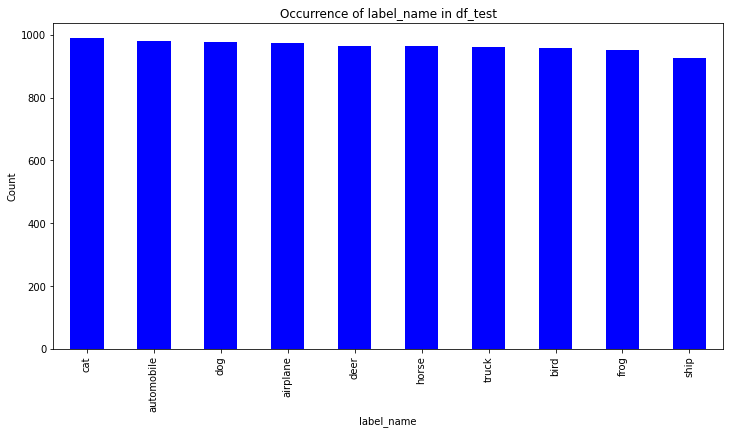

In [13]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_test['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_test')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [14]:
import os
import torch
import torchvision
import torch.utils.data
from torchvision.datasets import ImageFolder
#from torch.utils.dataset import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import json
from torchvision.transforms import transforms
import random

train_data = df_train
val_data = df_val
train_data_path = '/content/dataset/lensless_cifar10'
train_data_path2 = '/content/dataset/clean_cifar10'

class LenslessTripletDataset():

    def __init__(self, df, path_lensless, path_clean, train=True, transform=None):
        self.data_csv = df
        self.is_train = train
        self.transform = transform
        self.path_lensless = path_lensless
        self.path_clean = path_clean
        if self.is_train:
            
            self.anchorimages = df.iloc[:, 0].values
            self.anchorlabels = df.iloc[:, 4].values
            self.positiveimages = df.iloc[:, 1].values
            self.close_positiveimages = df.iloc[:, 2].values
            self.negativeimages = df.iloc[:, 3].values
            self.index = df.index.values 

    def __len__(self):
        return len(self.anchorimages)

    def __getitem__(self, item):
        anchor_image_name = self.anchorimages[item]
        anchor_image_path = self.path_lensless + '/' + anchor_image_name
        anchor_img = Image.open(anchor_image_path).convert('RGB')

        positive_image_name = self.positiveimages[item]
        positive_image_path = self.path_clean + '/' + positive_image_name
        positive_img = Image.open(positive_image_path).convert('RGB')

        close_positive_image_name = self.close_positiveimages[item]
        close_positive_image_path = self.path_clean + '/' + close_positive_image_name
        close_positive_img = Image.open(close_positive_image_path).convert('RGB')

        anchor_label = self.anchorlabels[item]

        negative_image_name = self.negativeimages[item]
        negative_image_path = self.path_clean + '/' + negative_image_name
        negative_img = Image.open(negative_image_path).convert('RGB')

        anchor_img = self.transform(anchor_img)
        positive_img = self.transform(positive_img)  
        close_positive_img = self.transform(close_positive_img)                  
        negative_img = self.transform(negative_img)

        return anchor_img, positive_img, close_positive_img, negative_img, anchor_label


    

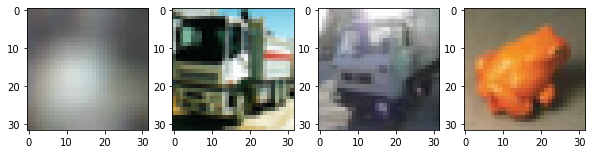

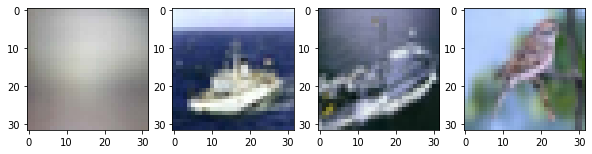

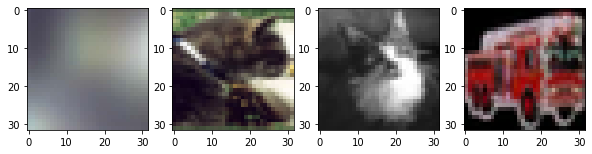

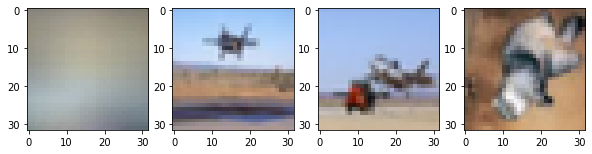

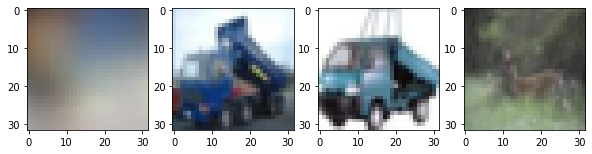

In [15]:
# Example data
df = df_train

# Example transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip()
])

# Create an instance of the LenslessTripletDataset class
dataset = LenslessTripletDataset(df, '/content/dataset/lensless_cifar10', '/content/dataset/clean_cifar10', True, transform)

# Access data using the instance
for i in range(5):
    anchor_img, positive_img, close_positive_img, negative_img, anchor_label = dataset[i]
    anchor_img = anchor_img.permute(1, 2, 0)  # Change shape from (3, 32, 32) to (32, 32, 3)
    positive_img = positive_img.permute(1, 2, 0)
    close_positive_img = close_positive_img.permute(1, 2, 0)
    negative_img = negative_img.permute(1, 2, 0)
    fig, ax = plt.subplots(1, 4, figsize=(10, 10))
    ax[0].imshow(anchor_img)
    ax[1].imshow(positive_img)
    ax[2].imshow(close_positive_img)
    ax[3].imshow(negative_img)

    plt.show()

##Quadruplet Loss

In [16]:
class QuadrupletLoss(torch.nn.Module):
    def __init__(self, margin1=0.005, margin2=0.007):
        super(QuadrupletLoss, self).__init__()
        self.margin1 = margin1
        self.margin2 = margin2

    def forward(self, anchor, positive, close_positive, negative):
        distance_pos = (anchor - positive).pow(2).sum(1)
        distance_neg = (anchor - negative).pow(2).sum(1)
        distance_close_pos = (anchor - close_positive).pow(2).sum(1)
        
        quadruplet_loss = F.relu(self.margin1 + distance_pos - distance_neg) + F.relu(self.margin2 + distance_pos - distance_close_pos)
        return quadruplet_loss.mean()

##Convolutional Neural Network

In [17]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torchvision.models import resnet18
import torch.nn as nn
import torch.nn.functional as F
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from torchsummary import summary
import torch.optim as optim

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc4 = nn.Linear(128 * 4 * 4, 512)
        self.relu4 = nn.ReLU(inplace=True)
        self.fc5 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim=1)  # Add a softmax layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)  # Apply the softmax function
        
        return x


In [18]:
def get_default_device():
#””Pick GPU if available, else CPU”””
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
IMAGE_SIZE = 32
BATCH_SIZE = 64
DEVICE = get_default_device()
LEARNING_RATE = 0.001
EPOCHS = 50

def get_train_dataset(IMAGE_SIZE=32):
    train_dataset = LenslessTripletDataset(train_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))]))
    return train_dataset

def get_val_dataset(IMAGE_SIZE=32):
    val_dataset = LenslessTripletDataset(val_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))]))
    return val_dataset

test_data = df_test
def get_test_dataset(IMAGE_SIZE=32):
    test_dataset = LenslessTripletDataset(test_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))]))
    return test_dataset


train_dataset = get_train_dataset(IMAGE_SIZE = IMAGE_SIZE)
val_dataset = get_val_dataset(IMAGE_SIZE = IMAGE_SIZE)
test_dataset = get_test_dataset(IMAGE_SIZE = IMAGE_SIZE)
train_dl = DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)
val_dl = DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)
test_dl = DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)

In [19]:
# Define your training loop
def train(model, train_dl, val_dl, loss_fn, optimizer, device):
    # Initialize empty lists to store the accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    model.train()
    best_val_acc = 0.0
    for epoch in tqdm(range(EPOCHS), desc="Epochs"):
        running_loss = []
        running_acc = []
        CROSS_ENTROPY_WEIGHT = 1
        for step, (anchor_img, positive_img, close_positive_img, negative_img, anchor_label) in enumerate(tqdm(train_dl, desc="Training", leave=False)):
            anchor_img = anchor_img.to(device)
            positive_img = positive_img.to(device)
            close_positive_img = close_positive_img.to(device)
            negative_img = negative_img.to(device)
            anchor_label = anchor_label.to(device)

            # Compute the output of the model
            anchor_output = model(anchor_img)
            positive_output = model(positive_img)
            close_positive_output = model(close_positive_img)
            negative_output = model(negative_img)

            # Compute the triplet loss
            triplet_loss = loss_fn(anchor_output, positive_output, close_positive_output, negative_output)

            # Compute the cross-entropy loss
            cross_entropy_loss = nn.CrossEntropyLoss()(anchor_output, anchor_label)

            # Compute the overall loss as a weighted sum of the triplet loss and cross-entropy loss
            loss = triplet_loss + CROSS_ENTROPY_WEIGHT * cross_entropy_loss

            # Compute the accuracy
            preds = torch.argmax(anchor_output, dim=1)
            acc = (preds == anchor_label).float().mean()

            # Update the running loss and accuracy
            running_loss.append(loss.item())
            running_acc.append(acc.item())

            # Zero the gradients, compute the gradients, and update the parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute the average training loss and accuracy
        avg_loss = sum(running_loss) / len(running_loss)
        avg_acc = sum(running_acc) / len(running_acc)

        # Append the average training loss and accuracy to the respective lists
        train_loss.append(avg_loss)
        train_acc.append(avg_acc)

        # Compute the validation loss and accuracy
        eval_loss, eval_acc = evaluate(model, val_dl, loss_fn, device)

        # Append the validation loss and accuracy to the list
        val_loss.append(eval_loss)
        val_acc.append(eval_acc)

        # Print the training loss, validation loss, training accuracy, and validation accuracy
        print(f"Epoch {epoch+1}/{EPOCHS} - Training loss: {avg_loss:.4f}, Validation loss: {eval_loss:.4f}, Training accuracy: {avg_acc:.4f}, Validation accuracy: {eval_acc:.4f}")

        # Save the model with the best validation accuracy
        if eval_acc > best_val_acc:
            best_val_acc = eval_acc
            torch.save(model.state_dict(), 'best_weights.pt')
    
    print(f'Best Validation Acc: {best_val_acc:.4f}')
    return train_loss, train_acc, val_loss, val_acc


def evaluate(model, val_dl, loss_fn, device):
    model.eval()
    with torch.no_grad():
        running_loss = []
        running_acc = []
        cross_entropy_weight = 1

        for step, (anchor_img, positive_img, close_positive_img, negative_img, anchor_label) in enumerate(tqdm(val_dl, desc="Evaluating", leave=False)):
            anchor_img = anchor_img.to(device)
            positive_img = positive_img.to(device)
            close_positive_img = close_positive_img.to(device)
            negative_img = negative_img.to(device)
            anchor_label = anchor_label.to(device)

            # Compute the output of the model
            anchor_output = model(anchor_img)
            positive_output = model(positive_img)
            close_positive_output = model(close_positive_img)
            negative_output = model(negative_img)

            # Compute the triplet loss
            triplet_loss = loss_fn(anchor_output, positive_output, close_positive_output, negative_output)

            # Compute the cross-entropy loss
            cross_entropy_loss = nn.CrossEntropyLoss()(anchor_output, anchor_label)

            # Compute the overall loss as a weighted sum of the triplet loss and cross-entropy loss
            loss = triplet_loss + cross_entropy_weight * cross_entropy_loss

            # Compute the accuracy
            preds = torch.argmax(anchor_output, dim=1)
            acc = (preds == anchor_label).float().mean()

            # Update the running loss and accuracy
            running_loss.append(loss.item())
            running_acc.append(acc.item())

        # Compute the average loss and accuracy
        avg_loss = sum(running_loss) / len(running_loss)
        avg_acc = sum(running_acc) / len(running_acc)

    return avg_loss, avg_acc



In [20]:
device = torch.device("cuda")
model = Network().to(device)
Optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = QuadrupletLoss()

##Model training

##50 Epochs

In [21]:
# Define your training loop
train_loss, train_acc, val_los, val_ac = train(model, train_dl, val_dl, loss_fn, Optimizer, device)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 1/50 - Training loss: 2.2834, Validation loss: 2.2651, Training accuracy: 0.1553, Validation accuracy: 0.1723


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 2/50 - Training loss: 2.2507, Validation loss: 2.2338, Training accuracy: 0.1946, Validation accuracy: 0.2148


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 3/50 - Training loss: 2.2292, Validation loss: 2.2161, Training accuracy: 0.2196, Validation accuracy: 0.2377


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 4/50 - Training loss: 2.2099, Validation loss: 2.2130, Training accuracy: 0.2428, Validation accuracy: 0.2411


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 5/50 - Training loss: 2.1949, Validation loss: 2.1972, Training accuracy: 0.2614, Validation accuracy: 0.2626


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 6/50 - Training loss: 2.1819, Validation loss: 2.1791, Training accuracy: 0.2753, Validation accuracy: 0.2767


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 7/50 - Training loss: 2.1707, Validation loss: 2.2011, Training accuracy: 0.2861, Validation accuracy: 0.2525


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 8/50 - Training loss: 2.1616, Validation loss: 2.1627, Training accuracy: 0.2986, Validation accuracy: 0.2956


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 9/50 - Training loss: 2.1523, Validation loss: 2.1803, Training accuracy: 0.3072, Validation accuracy: 0.2773


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 10/50 - Training loss: 2.1422, Validation loss: 2.1572, Training accuracy: 0.3185, Validation accuracy: 0.3026


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 11/50 - Training loss: 2.1368, Validation loss: 2.1608, Training accuracy: 0.3236, Validation accuracy: 0.2976


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 12/50 - Training loss: 2.1258, Validation loss: 2.1578, Training accuracy: 0.3368, Validation accuracy: 0.3005


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 13/50 - Training loss: 2.1203, Validation loss: 2.1464, Training accuracy: 0.3426, Validation accuracy: 0.3119


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 14/50 - Training loss: 2.1094, Validation loss: 2.1495, Training accuracy: 0.3547, Validation accuracy: 0.3095


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 15/50 - Training loss: 2.1014, Validation loss: 2.1484, Training accuracy: 0.3624, Validation accuracy: 0.3134


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 16/50 - Training loss: 2.0923, Validation loss: 2.1341, Training accuracy: 0.3706, Validation accuracy: 0.3244


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 17/50 - Training loss: 2.0837, Validation loss: 2.1339, Training accuracy: 0.3821, Validation accuracy: 0.3265


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 18/50 - Training loss: 2.0757, Validation loss: 2.1320, Training accuracy: 0.3904, Validation accuracy: 0.3307


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 19/50 - Training loss: 2.0664, Validation loss: 2.1282, Training accuracy: 0.3991, Validation accuracy: 0.3336


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 20/50 - Training loss: 2.0600, Validation loss: 2.1402, Training accuracy: 0.4054, Validation accuracy: 0.3213


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 21/50 - Training loss: 2.0561, Validation loss: 2.1322, Training accuracy: 0.4116, Validation accuracy: 0.3283


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 22/50 - Training loss: 2.0458, Validation loss: 2.1421, Training accuracy: 0.4205, Validation accuracy: 0.3210


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 23/50 - Training loss: 2.0382, Validation loss: 2.1280, Training accuracy: 0.4291, Validation accuracy: 0.3344


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 24/50 - Training loss: 2.0308, Validation loss: 2.1315, Training accuracy: 0.4362, Validation accuracy: 0.3315


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 25/50 - Training loss: 2.0215, Validation loss: 2.1260, Training accuracy: 0.4456, Validation accuracy: 0.3363


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 26/50 - Training loss: 2.0195, Validation loss: 2.1318, Training accuracy: 0.4486, Validation accuracy: 0.3326


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 27/50 - Training loss: 2.0109, Validation loss: 2.1318, Training accuracy: 0.4564, Validation accuracy: 0.3304


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 28/50 - Training loss: 2.0050, Validation loss: 2.1343, Training accuracy: 0.4628, Validation accuracy: 0.3284


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 29/50 - Training loss: 1.9978, Validation loss: 2.1301, Training accuracy: 0.4693, Validation accuracy: 0.3328


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 30/50 - Training loss: 1.9886, Validation loss: 2.1302, Training accuracy: 0.4791, Validation accuracy: 0.3335


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 31/50 - Training loss: 1.9882, Validation loss: 2.1294, Training accuracy: 0.4795, Validation accuracy: 0.3353


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 32/50 - Training loss: 1.9783, Validation loss: 2.1279, Training accuracy: 0.4907, Validation accuracy: 0.3357


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 33/50 - Training loss: 1.9772, Validation loss: 2.1338, Training accuracy: 0.4906, Validation accuracy: 0.3306


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 34/50 - Training loss: 1.9727, Validation loss: 2.1308, Training accuracy: 0.4958, Validation accuracy: 0.3337


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 35/50 - Training loss: 1.9646, Validation loss: 2.1313, Training accuracy: 0.5039, Validation accuracy: 0.3313


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 36/50 - Training loss: 1.9584, Validation loss: 2.1327, Training accuracy: 0.5096, Validation accuracy: 0.3305


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 37/50 - Training loss: 1.9543, Validation loss: 2.1279, Training accuracy: 0.5144, Validation accuracy: 0.3357


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 38/50 - Training loss: 1.9511, Validation loss: 2.1327, Training accuracy: 0.5172, Validation accuracy: 0.3316


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 39/50 - Training loss: 1.9412, Validation loss: 2.1285, Training accuracy: 0.5274, Validation accuracy: 0.3362


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 40/50 - Training loss: 1.9392, Validation loss: 2.1318, Training accuracy: 0.5285, Validation accuracy: 0.3326


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 41/50 - Training loss: 1.9405, Validation loss: 2.1295, Training accuracy: 0.5273, Validation accuracy: 0.3323


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 42/50 - Training loss: 1.9309, Validation loss: 2.1235, Training accuracy: 0.5385, Validation accuracy: 0.3404


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 43/50 - Training loss: 1.9249, Validation loss: 2.1316, Training accuracy: 0.5434, Validation accuracy: 0.3335


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 44/50 - Training loss: 1.9270, Validation loss: 2.1326, Training accuracy: 0.5414, Validation accuracy: 0.3318


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 45/50 - Training loss: 1.9216, Validation loss: 2.1335, Training accuracy: 0.5479, Validation accuracy: 0.3326


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 46/50 - Training loss: 1.9149, Validation loss: 2.1272, Training accuracy: 0.5543, Validation accuracy: 0.3376


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 47/50 - Training loss: 1.9181, Validation loss: 2.1316, Training accuracy: 0.5507, Validation accuracy: 0.3330


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 48/50 - Training loss: 1.9111, Validation loss: 2.1276, Training accuracy: 0.5581, Validation accuracy: 0.3363


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 49/50 - Training loss: 1.9072, Validation loss: 2.1319, Training accuracy: 0.5615, Validation accuracy: 0.3337


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 50/50 - Training loss: 1.9037, Validation loss: 2.1289, Training accuracy: 0.5655, Validation accuracy: 0.3370
Best Validation Acc: 0.3404


##30 Epochs

In [ ]:
# Define your training loop
train_loss, train_acc, val_los, val_ac = train(model, train_dl, val_dl, loss_fn, Optimizer, device)

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 1/30 - Training loss: 2.2842, Validation loss: 2.2586, Training accuracy: 0.1545, Validation accuracy: 0.1895


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 2/30 - Training loss: 2.2471, Validation loss: 2.2597, Training accuracy: 0.1982, Validation accuracy: 0.1857


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 3/30 - Training loss: 2.2295, Validation loss: 2.2212, Training accuracy: 0.2217, Validation accuracy: 0.2263


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 4/30 - Training loss: 2.2155, Validation loss: 2.2112, Training accuracy: 0.2380, Validation accuracy: 0.2441


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 5/30 - Training loss: 2.1993, Validation loss: 2.1946, Training accuracy: 0.2547, Validation accuracy: 0.2595


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 6/30 - Training loss: 2.1889, Validation loss: 2.1958, Training accuracy: 0.2662, Validation accuracy: 0.2577


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 7/30 - Training loss: 2.1809, Validation loss: 2.1996, Training accuracy: 0.2765, Validation accuracy: 0.2594


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 8/30 - Training loss: 2.1683, Validation loss: 2.1810, Training accuracy: 0.2893, Validation accuracy: 0.2752


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 9/30 - Training loss: 2.1593, Validation loss: 2.1749, Training accuracy: 0.2996, Validation accuracy: 0.2796


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 10/30 - Training loss: 2.1494, Validation loss: 2.1772, Training accuracy: 0.3098, Validation accuracy: 0.2814


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 11/30 - Training loss: 2.1420, Validation loss: 2.1716, Training accuracy: 0.3193, Validation accuracy: 0.2834


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 12/30 - Training loss: 2.1368, Validation loss: 2.1664, Training accuracy: 0.3252, Validation accuracy: 0.2898


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 13/30 - Training loss: 2.1259, Validation loss: 2.1610, Training accuracy: 0.3356, Validation accuracy: 0.2971


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 14/30 - Training loss: 2.1191, Validation loss: 2.1508, Training accuracy: 0.3431, Validation accuracy: 0.3093


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 15/30 - Training loss: 2.1102, Validation loss: 2.1550, Training accuracy: 0.3536, Validation accuracy: 0.3013


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 16/30 - Training loss: 2.1012, Validation loss: 2.1463, Training accuracy: 0.3622, Validation accuracy: 0.3124


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 17/30 - Training loss: 2.0959, Validation loss: 2.1411, Training accuracy: 0.3680, Validation accuracy: 0.3193


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 18/30 - Training loss: 2.0862, Validation loss: 2.1341, Training accuracy: 0.3786, Validation accuracy: 0.3227


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 19/30 - Training loss: 2.0806, Validation loss: 2.1411, Training accuracy: 0.3851, Validation accuracy: 0.3188


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 20/30 - Training loss: 2.0738, Validation loss: 2.1391, Training accuracy: 0.3899, Validation accuracy: 0.3220


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 21/30 - Training loss: 2.0687, Validation loss: 2.1447, Training accuracy: 0.3961, Validation accuracy: 0.3176


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 22/30 - Training loss: 2.0595, Validation loss: 2.1513, Training accuracy: 0.4058, Validation accuracy: 0.3088


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 23/30 - Training loss: 2.0573, Validation loss: 2.1485, Training accuracy: 0.4075, Validation accuracy: 0.3116


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 24/30 - Training loss: 2.0489, Validation loss: 2.1315, Training accuracy: 0.4170, Validation accuracy: 0.3313


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 25/30 - Training loss: 2.0403, Validation loss: 2.1303, Training accuracy: 0.4261, Validation accuracy: 0.3288


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 26/30 - Training loss: 2.0326, Validation loss: 2.1321, Training accuracy: 0.4337, Validation accuracy: 0.3312


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 27/30 - Training loss: 2.0276, Validation loss: 2.1317, Training accuracy: 0.4387, Validation accuracy: 0.3294


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 28/30 - Training loss: 2.0249, Validation loss: 2.1259, Training accuracy: 0.4422, Validation accuracy: 0.3349


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 29/30 - Training loss: 2.0197, Validation loss: 2.1323, Training accuracy: 0.4477, Validation accuracy: 0.3304


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 30/30 - Training loss: 2.0133, Validation loss: 2.1248, Training accuracy: 0.4536, Validation accuracy: 0.3392
Best Validation Acc: 0.3392


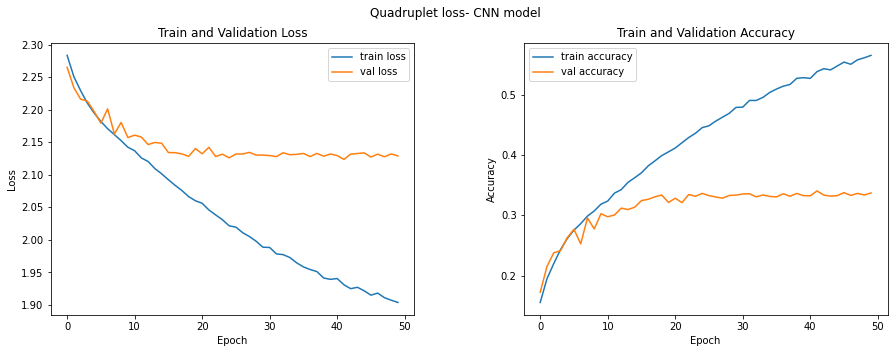

In [22]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

# Plot the train and val loss in the first subplot
axs[0].plot(train_loss, label='train loss')
axs[0].plot(val_los, label='val loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Train and Validation Loss')

# Plot the train and val accuracy in the second subplot
axs[1].plot(train_acc, label='train accuracy')
axs[1].plot(val_ac, label='val accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Train and Validation Accuracy')

# Add the main title
fig.suptitle('Quadruplet loss- CNN model')

# Save the plot with higher DPI
plt.savefig('Quadrupletloss_Len.jpeg', dpi=300)

In [21]:
df_test = df_test.sample(frac = 1)

In [22]:
df_test

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
4029,test-fighter_aircraft_s_000830.jpeg,test-fighter_aircraft_s_000830.png,test-fighter_aircraft_s_000843.png,test-garbage_truck_s_002196.png,0,airplane
7638,test-shooting_brake_s_001496.jpeg,test-shooting_brake_s_001496.png,test-shooting_brake_s_001575.png,test-bird_s_000496.png,1,automobile
277,test-alces_alces_s_000718.jpeg,test-alces_alces_s_000718.png,test-alces_alces_s_000737.png,test-monoplane_s_000930.png,4,deer
8912,test-toad_s_001243.jpeg,test-toad_s_001243.png,test-toad_s_001329.png,test-elk_s_001174.png,6,frog
6580,test-pekingese_s_001633.jpeg,test-pekingese_s_001633.png,test-pekingese_s_001636.png,test-jumbojet_s_000732.png,5,dog
...,...,...,...,...,...,...
5337,test-male_horse_s_000542.jpeg,test-male_horse_s_000542.png,test-male_horse_s_000543.png,test-biplane_s_000848.png,7,horse
5973,test-muntjac_s_001387.jpeg,test-muntjac_s_001387.png,test-muntjac_s_001393.png,test-spring_frog_s_000182.png,4,deer
8687,test-tennessee_walker_s_000444.jpeg,test-tennessee_walker_s_000444.png,test-tennessee_walker_s_000535.png,test-airbus_s_000782.png,7,horse
8800,test-tipper_s_001583.jpeg,test-tipper_s_001583.png,test-tipper_s_001596.png,test-cassowary_s_001999.png,9,truck


In [23]:
import pandas as pd
import numpy as np

# Load the dataframe
df = df_test

# Define the number of images to select from each class
num_images_per_class = 50

# Group the dataframe by the label column
grouped = df.groupby('label')

# Initialize an empty list to store the selected rows
selected_rows = []

# Loop over each label group
for label, group in grouped:

    # Check if there are at least 50 rows in the group
    if len(group) >= num_images_per_class:
        # If there are, randomly select 50 rows
        selected = group.sample(n=num_images_per_class, random_state=42)
    else:
        # If there are fewer than 50 rows, select all of them
        selected = group

    # Append the selected rows to the list
    selected_rows.append(selected)

# Concatenate the selected rows into a single dataframe
selected_data = pd.concat(selected_rows)

# Print the selected rows
selected_data

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
4039,test-fighter_aircraft_s_001207.jpeg,test-fighter_aircraft_s_001207.png,test-fighter_aircraft_s_001215.png,test-cervus_elaphus_s_000002.png,0,airplane
8165,test-stealth_fighter_s_001314.jpeg,test-stealth_fighter_s_001314.png,test-stealth_fighter_s_001315.png,test-domestic_cat_s_000198.png,0,airplane
4802,test-jetliner_s_000761.jpeg,test-jetliner_s_000761.png,test-jetliner_s_000765.png,test-cat_s_001231.png,0,airplane
4827,test-jumbo_jet_s_000024.jpeg,test-jumbo_jet_s_000024.png,test-jumbo_jet_s_000113.png,test-mouser_s_000696.png,0,airplane
8180,test-stealth_fighter_s_001875.jpeg,test-stealth_fighter_s_001875.png,test-stealth_fighter_s_001894.png,test-boat_s_000710.png,0,airplane
...,...,...,...,...,...,...
3448,test-dump_truck_s_002001.jpeg,test-dump_truck_s_002001.png,test-dump_truck_s_002007.png,test-alces_alces_s_001339.png,9,truck
9149,test-truck_s_000024.jpeg,test-truck_s_000024.png,test-truck_s_000064.png,test-fawn_s_001490.png,9,truck
2983,test-delivery_truck_s_000465.jpeg,test-delivery_truck_s_000465.png,test-delivery_truck_s_000468.png,test-pekingese_s_002003.png,9,truck
9262,test-trucking_rig_s_001412.jpeg,test-trucking_rig_s_001412.png,test-trucking_rig_s_001414.png,test-tabby_s_001806.png,9,truck


In [26]:
def get_selected_dataset(IMAGE_SIZE=32):
    selected_dataset = LenslessTripletDataset(selected_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),transforms.RandomHorizontalFlip(p = 0.2), transforms.RandomVerticalFlip(p=0.8),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))
    return selected_dataset

selected_dataset = get_selected_dataset(IMAGE_SIZE = IMAGE_SIZE)

selected_dl = DataLoader(selected_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)

Generating embeddings:   0%|          | 0/8 [00:00<?, ?it/s]

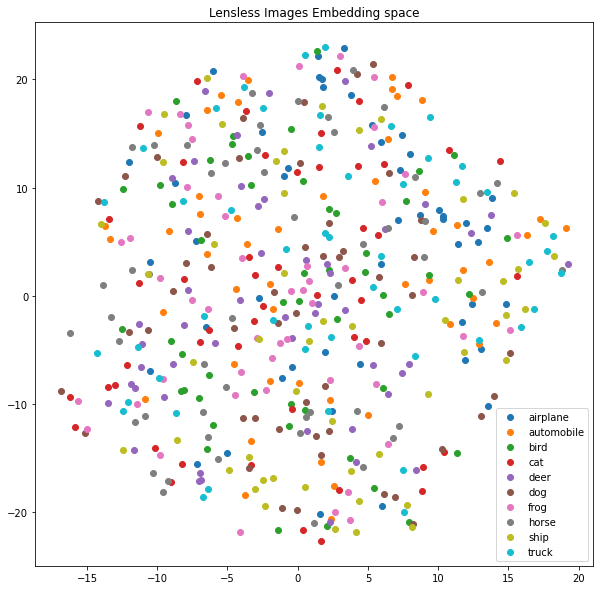

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate embeddings for the test set
test_embeddings = []
test_labels = []
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
with torch.no_grad():
    for step, (test_img, pos1_img, pos2_img, neg_img, test_label) in enumerate(tqdm(selected_dl, desc="Generating embeddings", leave=False)):
        test_img = test_img.to(device)
        test_label = test_label.to(device)

        # Flatten the test image tensors
        test_img = test_img.view(test_img.size(0), -1)

        # Append the flattened embeddings and labels to the respective lists
        test_embeddings.append(test_img.cpu().numpy())
        test_labels.append(test_label.cpu().numpy())

# Concatenate the embeddings and labels to form arrays
test_embeddings = np.concatenate(test_embeddings)
test_labels = np.concatenate(test_labels)

# Use t-SNE algorithm to reduce the dimensions of the embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
test_embeddings_2d = tsne.fit_transform(test_embeddings)

# Visualize the embeddings in a 2D plot
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(test_labels)):
    plt.scatter(test_embeddings_2d[test_labels == label, 0], test_embeddings_2d[test_labels == label, 1], label=class_names[label])
plt.legend()

# Add the main title
plt.title('Lensless Images Embedding space')
# Save the plot with higher DPI
plt.savefig('Lensless Embedding space Lensless.jpeg', dpi=300)


Generating embeddings:   0%|          | 0/8 [00:00<?, ?it/s]

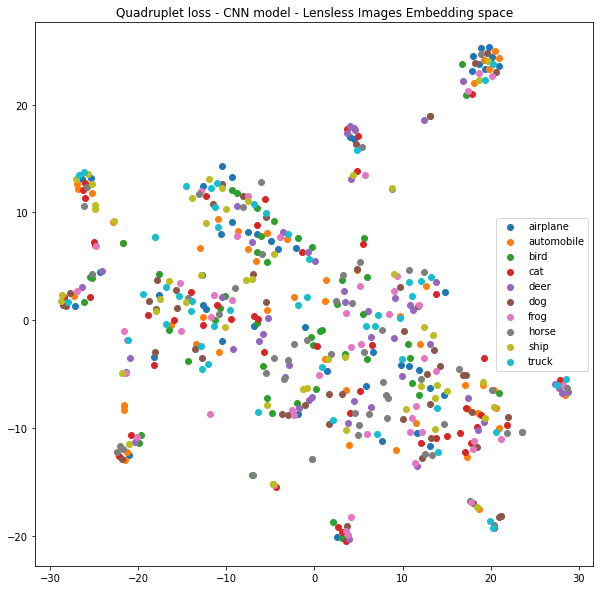

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Create a list of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load the saved model
model.load_state_dict(torch.load('best_weights.pt'))
model.eval()

# Generate embeddings for the test set
test_embeddings = []
test_labels = []
with torch.no_grad():
    for step, (test_img, positive_img, close_positive_img, negative_img, test_label) in enumerate(tqdm(selected_dl, desc="Generating embeddings", leave=False)):
        test_img = test_img.to(device)
        test_label = test_label.to(device)

        # Compute the output of the model
        test_output = model(test_img)

        # Append the embeddings and labels to the respective lists
        test_embeddings.append(test_output.cpu().numpy())
        test_labels.append(test_label.cpu().numpy())

# Concatenate the embeddings and labels to form arrays
test_embeddings = np.concatenate(test_embeddings)
test_labels = np.concatenate(test_labels)

# Use t-SNE algorithm to reduce the dimensions of the embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
test_embeddings_2d = tsne.fit_transform(test_embeddings)

# Visualize the embeddings in a 2D plot
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(test_labels)):
    plt.scatter(test_embeddings_2d[test_labels == label, 0], test_embeddings_2d[test_labels == label, 1], label=class_names[label])
plt.legend()
# Add the main title
plt.title('Quadruplet loss - CNN model - Lensless Images Embedding space')
# Save the plot with higher DPI
plt.savefig('Quadruplet loss - CNN model - Lensless Images Embedding space.jpeg', dpi=300)


In [24]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image

# 1. Define the preprocessing steps for the input image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))
])

# 2. Load the saved weights into the model
model = Network()
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/best_weights_quadrupletloss_lensless_50.pt'))

# 3. Move the model to the appropriate device (CPU or GPU)
model.to(device)

# 4. Set the model to evaluation mode
model.eval()

# 5. Load a list of image names
image_names = (df_test['archor_img'].tolist())

# 6. Loop over the image names and make predictions
results = []
results_encode = []
for image_name in image_names:
    # 7. Open the image and preprocess it
    img_path = os.path.join('/content/dataset/lensless_cifar10', image_name)
    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    # 8. Use the model to make a prediction
    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)

    # 9. Store the predicted class
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    pred_class = class_names[pred.item()]
    results.append(pred_class)
    results_encode.append(pred.item())

# 10. Print the results
ground_truth = (df_test['label_name'].tolist())
ground_truth_encode = (df_test['label'].tolist())
print("Predicted classes:", results)
print("Ground truth:", ground_truth)
print("Predicted classes encode:", results_encode)
print("Label encode:",ground_truth_encode )

Predicted classes: ['frog', 'frog', 'deer', 'frog', 'dog', 'ship', 'truck', 'ship', 'truck', 'deer', 'cat', 'dog', 'automobile', 'ship', 'ship', 'horse', 'bird', 'airplane', 'horse', 'dog', 'deer', 'airplane', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'ship', 'dog', 'frog', 'automobile', 'automobile', 'automobile', 'dog', 'automobile', 'deer', 'ship', 'automobile', 'airplane', 'frog', 'cat', 'automobile', 'truck', 'bird', 'ship', 'cat', 'truck', 'cat', 'automobile', 'automobile', 'horse', 'ship', 'ship', 'horse', 'frog', 'deer', 'automobile', 'dog', 'cat', 'airplane', 'automobile', 'automobile', 'frog', 'automobile', 'ship', 'airplane', 'dog', 'ship', 'frog', 'horse', 'truck', 'cat', 'bird', 'horse', 'horse', 'horse', 'airplane', 'airplane', 'automobile', 'dog', 'dog', 'horse', 'deer', 'airplane', 'horse', 'cat', 'deer', 'cat', 'bird', 'automobile', 'horse', 'truck', 'cat', 'cat', 'airplane', 'truck', 'frog', 'horse', 'truck', 'truck', 'automobile', 'automobile', 'horse', 'f

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(ground_truth, results)

# Calculate the precision
precision = precision_score(ground_truth, results, average='weighted')

# Calculate the recall
recall = recall_score(ground_truth, results, average='weighted')

# Calculate the F1-score
f1 = f1_score(ground_truth, results, average='weighted')

# Convert to percentages and round to two decimal places
accuracy = '{:.2%}'.format(accuracy)
precision = '{:.2%}'.format(precision)
recall = '{:.2%}'.format(recall)
f1 = '{:.2%}'.format(f1)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 32.17%
Precision: 31.88%
Recall: 32.17%
F1-score: 31.73%


In [ ]:
%cd /content/drive/MyDrive/Model

/content/drive/MyDrive/Model


In [ ]:
# Example code to save a PyTorch model
torch.save(model.state_dict(), 'best_weights.pt')

In [32]:
from numpy import random
import matplotlib.pyplot as plt

# calculate the prior probabilities
x = random.uniform(size=(1, 10))
prior_probs = x[0]


# calculate the likelihood probabilities
predicted_labels = results_encode
histogram, bins = np.histogram(predicted_labels, bins=range(11))
likelihood_probs = histogram / len(predicted_labels)

# calculate the posterior probabilities
posterior_probs = likelihood_probs * prior_probs

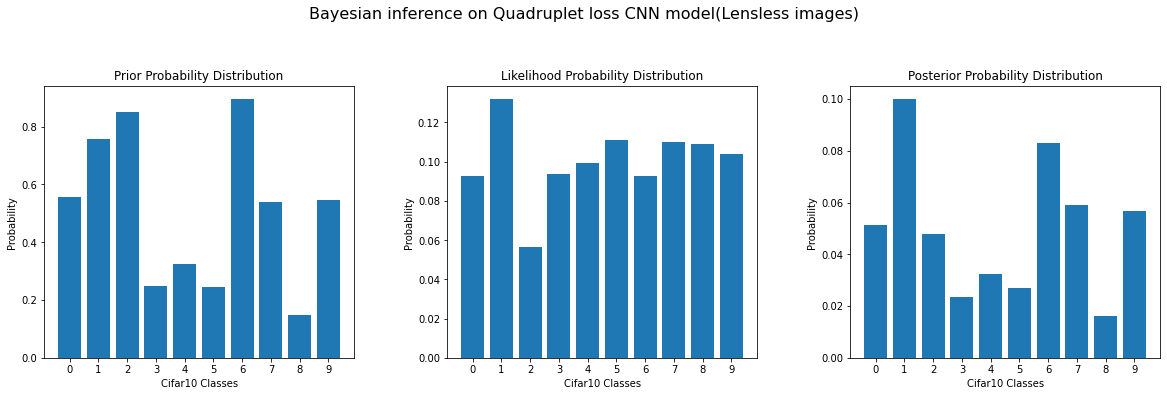

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

# Add main title
fig.suptitle('Bayesian inference on Quadruplet loss CNN model(Lensless images)', fontsize=16, y=1.1)

# Plot the train and val loss in the first subplot
axs[0].bar(range(10), prior_probs)
axs[0].set_title('Prior Probability Distribution')
axs[0].set_xlabel('Cifar10 Classes')
axs[0].set_ylabel('Probability')
axs[0].set_xticks(range(10))
axs[0].set_xticklabels(range(10))

axs[1].bar(range(10), likelihood_probs)
axs[1].set_title('Likelihood Probability Distribution')
axs[1].set_xlabel('Cifar10 Classes')
axs[1].set_ylabel('Probability')
axs[1].set_xticks(range(10))
axs[1].set_xticklabels(range(10))

axs[2].bar(range(10), posterior_probs)
axs[2].set_title('Posterior Probability Distribution')
axs[2].set_xlabel('Cifar10 Classes')
axs[2].set_ylabel('Probability')
axs[2].set_xticks(range(10))
axs[2].set_xticklabels(range(10))

plt.savefig('Bayesian inference on Quadruplet loss CNN model(Lensless images).jpeg', bbox_inches='tight')

In [34]:
q = posterior_probs
q = q.tolist()

In [35]:
pg = [0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [36]:
from scipy.special import rel_entr

#calculate (P || Q)
print("KL divergence:",sum(rel_entr(pg, q)),'nats')

KL divergence: 0.8383306787696252 nats
